<a href="https://colab.research.google.com/github/cabluemgeek/Crude-Oil-Forecast-/blob/main/Monthly_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Handling**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
seed = 42
random.seed(seed)
np.random.seed(seed)

In [ ]:
data= pd.read_csv('/content/data monthlyy.csv', sep=";")
data.head()

,index,MONTH,WOD,N-OS,OP,USD/DZD,GPR,PRICE
0,0,Jan-00,"75,58","45,8","26,5","68,232775","64,46","25,6"
1,1,Feb-00,NaN,NaN,NaN,"69,198775","63,54","26,3"
2,2,Mar-00,NaN,NaN,NaN,"72,134723","50,1","26,7"
3,3,Apr-00,"74,09","45,5","27,9","73,913208","48,68","26,5"
4,4,May-00,NaN,NaN,NaN,"76,018356","79,48","27,4"


In [ ]:
data['MONTH'] = pd.to_datetime(data['MONTH'], format='%b-%y')
data.set_index('MONTH', inplace=True)

In [ ]:
data = data.drop('index', axis=1)

In [ ]:
data['WOD'] = data['WOD'].str.replace(',', '.')
data['GPR'] = data['GPR'].str.replace(',', '.')
data['N-OS'] = data['N-OS'].str.replace(',', '.')
data['OP'] = data['OP'].str.replace(',', '.')
data['PRICE'] = data['PRICE'].str.replace(',', '.')
data['USD/DZD'] = data['USD/DZD'].str.replace(',', '.')

In [ ]:
print(data)

               WOD   N-OS     OP     USD/DZD     GPR   PRICE
MONTH                                                       
2000-01-01   75.58   45.8   26.5   68.232775   64.46    25.6
2000-02-01     NaN    NaN    NaN   69.198775   63.54    26.3
2000-03-01     NaN    NaN    NaN   72.134723    50.1    26.7
2000-04-01   74.09   45.5   27.9   73.913208   48.68    26.5
2000-05-01     NaN    NaN    NaN   76.018356   79.48    27.4
...            ...    ...    ...         ...     ...     ...
2022-08-01     NaN    NaN    NaN  142.450548  132.86  104.22
2022-09-01     NaN    NaN    NaN  140.559909  131.99   92.72
2022-10-01  101.17  66.84  29.11  140.263062  143.16   95.66
2022-11-01     NaN    NaN    NaN  139.251141  116.72    93.6
2022-12-01     NaN    NaN    NaN  137.577482   111.2   83.03

[276 rows x 6 columns]


In [ ]:
data['USD/DZD'] = data['USD/DZD'].astype(float)
data['GPR'] = data['GPR'].astype(float)
data['OP'] = data['OP'].astype(float)
data['N-OS'] = data['N-OS'].astype(float)
data['WOD'] = data['WOD'].astype(float)
data['PRICE'] = data['PRICE'].astype(float)

In [ ]:
data

,WOD,N-OS,OP,USD/DZD,GPR,PRICE
MONTH,,,,,,
2000-01-01,75.58,45.80,26.50,68.232775,64.46,25.60
2000-02-01,NaN,NaN,NaN,69.198775,63.54,26.30
2000-03-01,NaN,NaN,NaN,72.134723,50.10,26.70
2000-04-01,74.09,45.50,27.90,73.913208,48.68,26.50
2000-05-01,NaN,NaN,NaN,76.018356,79.48,27.40
...,...,...,...,...,...,...
2022-08-01,NaN,NaN,NaN,142.450548,132.86,104.22
2022-09-01,NaN,NaN,NaN,140.559909,131.99,92.72
2022-10-01,101.17,66.84,29.11,140.263062,143.16,95.66


In [ ]:
data.isnull().sum()

WOD        184
N-OS       184
OP         182
USD/DZD      0
GPR          0
PRICE        0
dtype: int64

In [ ]:
data = data.fillna(method='ffill')
data

,WOD,N-OS,OP,USD/DZD,GPR,PRICE
MONTH,,,,,,
2000-01-01,75.58,45.80,26.50,68.232775,64.46,25.60
2000-02-01,75.58,45.80,26.50,69.198775,63.54,26.30
2000-03-01,75.58,45.80,26.50,72.134723,50.10,26.70
2000-04-01,74.09,45.50,27.90,73.913208,48.68,26.50
2000-05-01,74.09,45.50,27.90,76.018356,79.48,27.40
...,...,...,...,...,...,...
2022-08-01,99.44,65.55,29.41,142.450548,132.86,104.22
2022-09-01,99.44,65.55,29.41,140.559909,131.99,92.72
2022-10-01,101.17,66.84,29.11,140.263062,143.16,95.66


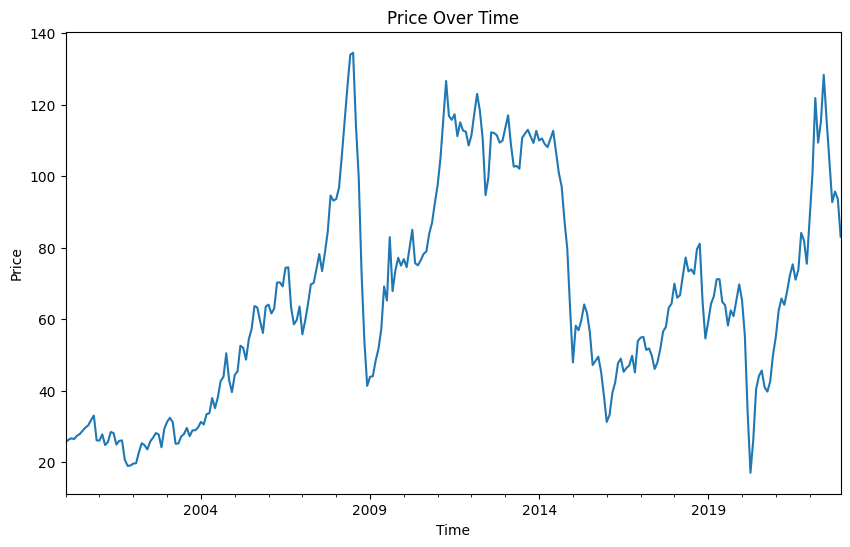

In [ ]:
#plotting price over time-frame
data['PRICE'].plot(kind='line', figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Over Time')
plt.show()

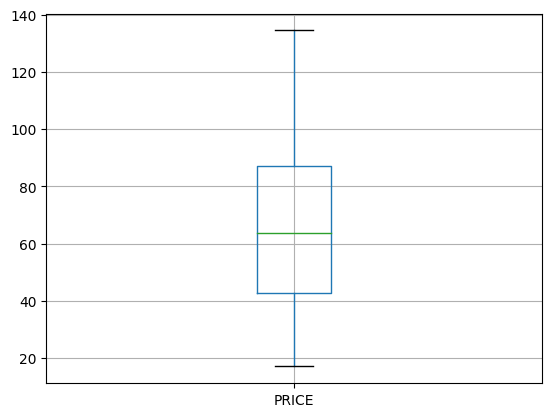

In [ ]:
import matplotlib.pyplot as plt
data.boxplot(column='PRICE')
plt.show()

**Preprocessing**

**OUTLIERS**

In [ ]:
Q1 = data['PRICE'].quantile(0.25)
Q3 = data['PRICE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['PRICE'] < lower_bound) | (data['PRICE'] > upper_bound)]
outliers

,WOD,N-OS,OP,USD/DZD,GPR,PRICE
MONTH,,,,,,


In [ ]:
# Calculate the Z-score for each data point
z_scores = np.abs((data['PRICE'] - data['PRICE'].mean()) / data['PRICE'].std())

# Identify outliers with Z-scores greater than 3 or less than -3
outliers = data[np.logical_or(z_scores > 3, z_scores < -3)]
print(outliers)

Empty DataFrame
Columns: [WOD, N-OS, OP, USD/DZD, GPR, PRICE]
Index: []


CORRELATION

In [ ]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()
corr_matrix

,WOD,N-OS,OP,USD/DZD,GPR,PRICE
WOD,1.000000,0.952093,0.422263,0.755920,-0.165567,0.462554
N-OS,0.952093,1.000000,0.329375,0.766117,-0.097864,0.367077
OP,0.422263,0.329375,1.000000,-0.102072,-0.204936,0.420816
USD/DZD,0.755920,0.766117,-0.102072,1.000000,0.018238,-0.003532
GPR,-0.165567,-0.097864,-0.204936,0.018238,1.000000,-0.201177
PRICE,0.462554,0.367077,0.420816,-0.003532,-0.201177,1.000000


.

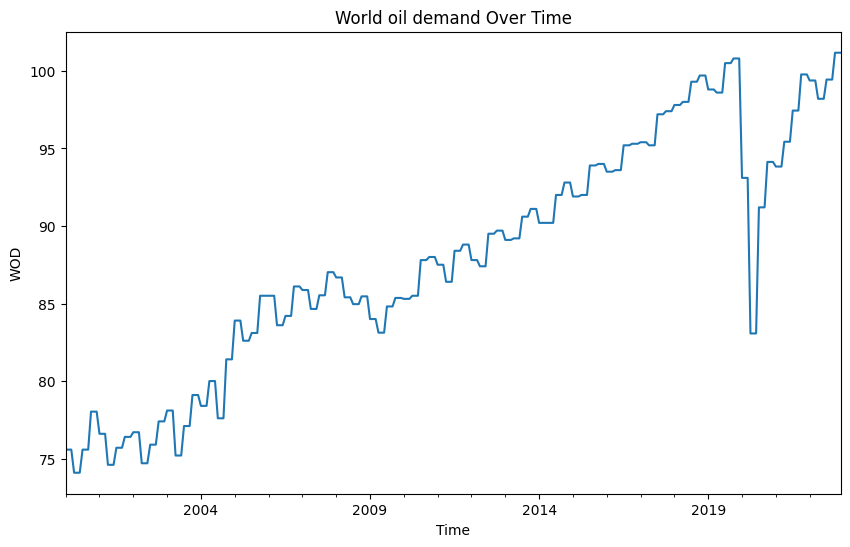

In [ ]:
#plotting WOD over time-frame
data['WOD'].plot(kind='line', figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('WOD')
plt.title('World oil demand Over Time')
plt.show()

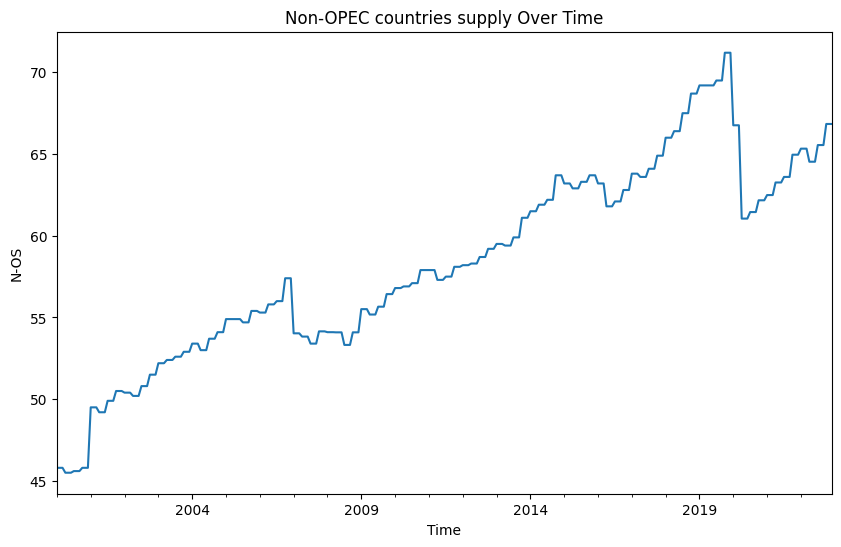

In [ ]:
#plotting N-OS over time-frame
data['N-OS'].plot(kind='line', figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('N-OS')
plt.title('Non-OPEC countries supply Over Time')
plt.show()

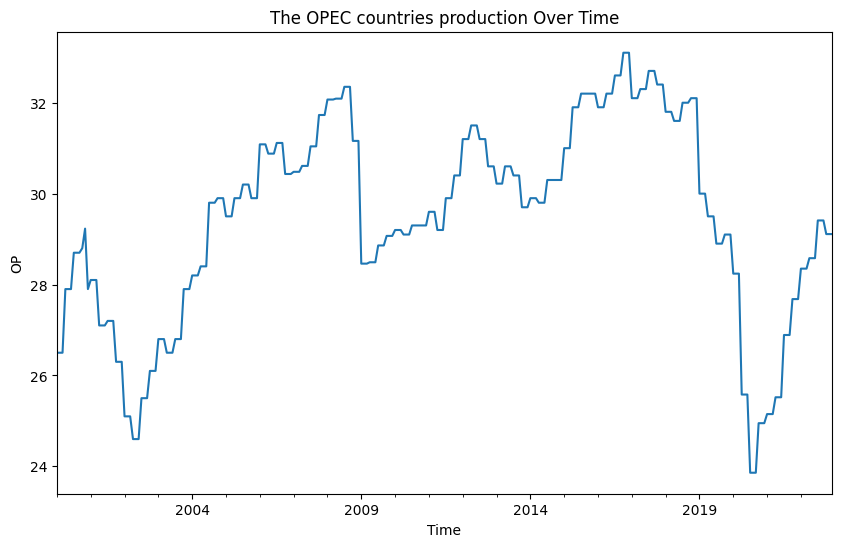

In [ ]:
#plotting OP over time-frame
data['OP'].plot(kind='line', figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('OP')
plt.title('The OPEC countries production Over Time')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense

# **Split data**

In [ ]:
# Split data into training and testing sets
X = data[['WOD', 'N-OS', 'OP', 'GPR', 'USD/DZD']]
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
from sklearn.metrics import mean_squared_error

# **SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

In [ ]:
svr=SVR()

In [ ]:
# Perform grid search with MSE as the scoring metric
grid_search_svr = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters and the corresponding model
best_params_svr = grid_search_svr.best_params_
best_model_svr = grid_search_svr.best_estimator_

In [ ]:
# Print best parameters and best score
print("Best Parameters found: ", grid_search_svr.best_params_)
print("Lowest score found: ", -grid_search_svr.best_score_)

Best Parameters found:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Lowest score found:  223.0205716738946


In [ ]:
# Make predictions using the best model
svr_predictions = best_model_svr.predict(X_test)
resultsSVR = pd.DataFrame({'actual prices': y_test, 'SVR predictionds': svr_predictions})
print(resultsSVR)

            actual prices  SVR predictionds
MONTH                                      
2002-07-01      25.790001         25.940591
2010-05-01      75.669998         73.813121
2016-05-01      47.730000         45.244139
2010-08-01      78.220001         91.083027
2018-01-01      69.930000         57.603674
2019-07-01      63.919998         61.818479
2012-01-01     111.430000        103.483559
2016-12-01      53.820000         50.903867
2021-03-01      65.760002         62.988246
2011-12-01     108.559998        106.420429
2006-08-01      74.500000         71.790033
2011-01-01      97.500000         98.171206
2019-10-01      60.860001         67.857091
2022-02-01     100.709999         88.966499
2012-09-01     112.059998        104.821510
2011-11-01     112.410004        109.153214
2021-09-01      73.849998         77.759998
2005-01-01      44.389999         56.302307
2007-01-01      55.779999         63.202666
2019-12-01      69.739998         64.075073
2003-10-01      28.940001       

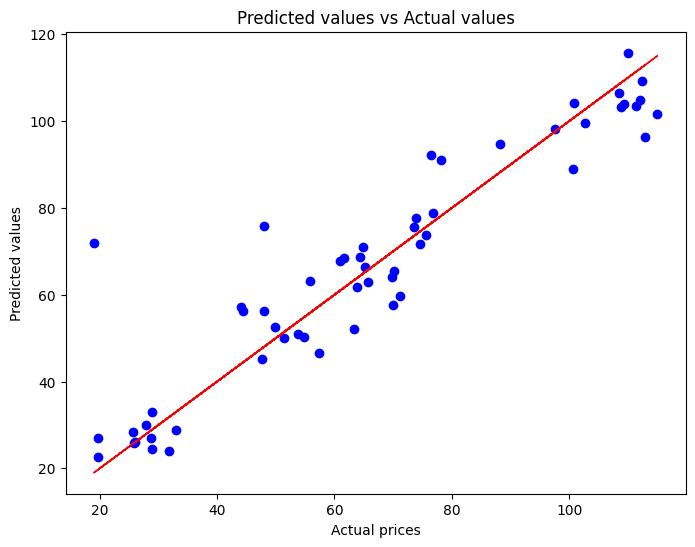

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_predictions, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=1)
plt.xlabel('Actual prices')
plt.ylabel('Predicted values')
plt.title('Predicted values vs Actual values')
plt.show()

In [ ]:
# Calculate RMSE and R2
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
svr_r2 = r2_score(y_test, svr_predictions)

print(f"Best parameters: {best_params_svr}")
print(f"RMSE: {svr_rmse:.2f}")
print(f"R2: {svr_r2:.2f}")

Best parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
RMSE: 10.64
R2: 0.86


# **XGB**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
     'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [3, 4],
              'silent': [1],
    'reg_lambda': [0.1],
     'reg_alpha': [0],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]

}





In [ ]:
# Initialize XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, eval_metric='rmse')

In [ ]:
# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:31:41] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:31:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [3, 4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'reg_alpha': [0],
                         'reg_lambda': [0.1], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_
# Print best parameters and best score
print("Best Parameters found: ", grid_search_xgb.best_params_)
print("Lowest Score found: ", -grid_search_xgb.best_score_)

Best Parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'reg_alpha': 0, 'reg_lambda': 0.1, 'silent': 1, 'subsample': 0.7}
Lowest Score found:  93.18370666503907


In [ ]:
# Fit GridSearchCV
from sklearn.model_selection import GridSearchCV



In [ ]:
# Use the best estimator to predict on test data
xgb_predictions = best_model_xgb.predict(X_test)
resultsXGB = pd.DataFrame({'actual prices': y_test, 'XGBoost predictionds': xgb_predictions})
print(resultsXGB)

            actual prices  XGBoost predictionds
MONTH                                          
2002-07-01      25.790001             26.502102
2010-05-01      75.669998             80.959953
2016-05-01      47.730000             43.282009
2010-08-01      78.220001             86.731949
2018-01-01      69.930000             67.943268
2019-07-01      63.919998             64.661362
2012-01-01     111.430000            106.733650
2016-12-01      53.820000             49.741158
2021-03-01      65.760002             59.787117
2011-12-01     108.559998            111.440636
2006-08-01      74.500000             71.732094
2011-01-01      97.500000            102.295090
2019-10-01      60.860001             63.412384
2022-02-01     100.709999            101.104103
2012-09-01     112.059998            103.347450
2011-11-01     112.410004            110.743187
2021-09-01      73.849998             70.146339
2005-01-01      44.389999             48.054611
2007-01-01      55.779999             62

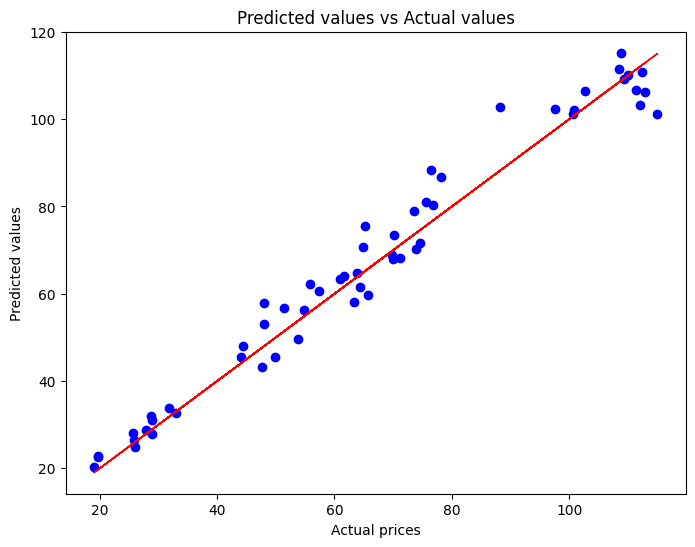

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_predictions, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=1)
plt.xlabel('Actual prices')
plt.ylabel('Predicted values')
plt.title('Predicted values vs Actual values')
plt.show()

In [ ]:
# Calculate RMSE on test set
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print(f"RMSE on test set: {xgb_rmse}")

RMSE on test set: 5.185967445373535


In [ ]:
from sklearn.metrics import r2_score

# Supposons que vous ayez des données réelles y_true et des prédictions y_pred
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"R² = {xgb_r2:.2f}")

R² = 0.97


# **RF**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score




# Define the parameter grid for the Random Forest model
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestRegressor()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)



# Get the best model and its parameters
best_model_rf = grid_search.best_estimator_
best_params_rf = grid_search.best_params_

# Print best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Lowest score found: ", -grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best Parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Lowest score found:  74.70893369615784


In [ ]:
# Use the best model to make predictions on the test set
rf_predictions = best_model_rf.predict(X_test)
resultsRF = pd.DataFrame({'actual prices': y_test, 'randomforest predictionds': rf_predictions})
print(resultsRF)

            actual prices  randomforest predictionds
MONTH                                               
2002-07-01      25.790001                  26.137351
2010-05-01      75.669998                  78.002750
2016-05-01      47.730000                  47.064000
2010-08-01      78.220001                  91.912349
2018-01-01      69.930000                  67.616101
2019-07-01      63.919998                  63.874051
2012-01-01     111.430000                 113.863300
2016-12-01      53.820000                  47.225700
2021-03-01      65.760002                  56.340401
2011-12-01     108.559998                 111.830800
2006-08-01      74.500000                  68.282801
2011-01-01      97.500000                 108.064801
2019-10-01      60.860001                  64.055151
2022-02-01     100.709999                  99.700452
2012-09-01     112.059998                 107.502501
2011-11-01     112.410004                 113.669050
2021-09-01      73.849998                  80.

In [ ]:


# Calculate the Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'MSE: {rf_mse:.2f}')

# Calculate the R-squared (R2)
rf_r2 = r2_score(y_test, rf_predictions)
print(f'R2: {rf_r2:.2f}')

# Calculate the Root Mean Squared Error (RMSE)
rf_rmse = rf_mse ** 0.5
print(f'RMSE: {rf_rmse:.2f}')

MSE: 34.08
R2: 0.96
RMSE: 5.84


# **Random Forest**

In [ ]:
rf = RandomForestRegressor(random_state=seed)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_predictions = rf.predict(X_test)
rf_results = pd.DataFrame({'actual prices': y_test, 'randomforest predictionds': rf_predictions})
print(rf_results)

            actual prices  randomforest predictionds
MONTH                                               
2002-07-01      25.790001                  26.252701
2010-05-01      75.669998                  76.912800
2016-05-01      47.730000                  46.968400
2010-08-01      78.220001                  88.267298
2018-01-01      69.930000                  67.651401
2019-07-01      63.919998                  63.347100
2012-01-01     111.430000                 114.290600
2016-12-01      53.820000                  47.083800
2021-03-01      65.760002                  56.765501
2011-12-01     108.559998                 110.380140
2006-08-01      74.500000                  69.502501
2011-01-01      97.500000                 109.285400
2019-10-01      60.860001                  63.504601
2022-02-01     100.709999                  98.515102
2012-09-01     112.059998                 106.514802
2011-11-01     112.410004                 112.385139
2021-09-01      73.849998                  83.

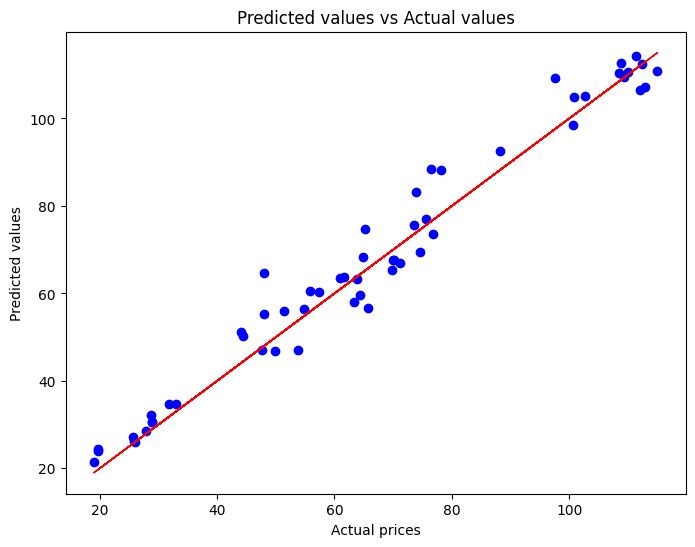

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=1)
plt.xlabel('Actual prices')
plt.ylabel('Predicted values')
plt.title('Predicted values vs Actual values')
plt.show()

In [ ]:
# Calculate RMSE on test set
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print(f"RMSE on test set: {rf_rmse}")
rf_r2 = r2_score(y_test, rf_predictions)
print(f"R² = {rf_r2:.2f}")

RMSE on test set: 5.288514497411396
R² = 0.97


In [ ]:

from sklearn.metrics import r2_score

rf_r2 = r2_score(y_test, rf_predictions)
print(f"R² = {rf_r2:.2f}")

R² = 0.97


# **rf**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create the random forest model
rf = RandomForestRegressor(random_state=42)

In [ ]:
# Perform grid search
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2')

# **LSTM**

In [ ]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Fit model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
220/220 - 3s - loss: 4855.0249 - 3s/epoch - 15ms/step
Epoch 2/100
220/220 - 1s - loss: 4224.9966 - 561ms/epoch - 3ms/step
Epoch 3/100
220/220 - 1s - loss: 3629.8809 - 523ms/epoch - 2ms/step
Epoch 4/100
220/220 - 1s - loss: 3152.5574 - 557ms/epoch - 3ms/step
Epoch 5/100
220/220 - 0s - loss: 2741.0950 - 493ms/epoch - 2ms/step
Epoch 6/100
220/220 - 1s - loss: 2396.3711 - 545ms/epoch - 2ms/step
Epoch 7/100
220/220 - 1s - loss: 2090.6321 - 608ms/epoch - 3ms/step
Epoch 8/100
220/220 - 1s - loss: 1850.3779 - 613ms/epoch - 3ms/step
Epoch 9/100
220/220 - 1s - loss: 1656.3591 - 551ms/epoch - 3ms/step
Epoch 10/100
220/220 - 1s - loss: 1499.1968 - 561ms/epoch - 3ms/step
Epoch 11/100
220/220 - 1s - loss: 1371.8425 - 562ms/epoch - 3ms/step
Epoch 12/100
220/220 - 1s - loss: 1254.4656 - 507ms/epoch - 2ms/step
Epoch 13/100
220/220 - 1s - loss: 1168.0419 - 526ms/epoch - 2ms/step
Epoch 14/100
220/220 - 0s - loss: 1116.2374 - 498ms/epoch - 2ms/step
Epoch 15/100
220/220 - 1s - loss: 1129.1353 -

In [ ]:
# Make predictions
lstm_predictions = model.predict(X_test)
resultsLSTM = pd.DataFrame({'actual prices': y_test, 'lstm_predictions': lstm_predictions.flatten()})
print(resultsLSTM)

2/2 [==============================] - 1s 9ms/step
            actual prices  lstm_predictions
MONTH                                      
2002-07-01      25.790001         55.798805
2010-05-01      75.669998         80.261452
2016-05-01      47.730000         67.237045
2010-08-01      78.220001         80.126419
2018-01-01      69.930000         70.779533
2019-07-01      63.919998         71.889885
2012-01-01     111.430000         79.698021
2016-12-01      53.820000         75.879997
2021-03-01      65.760002         54.053925
2011-12-01     108.559998         80.261681
2006-08-01      74.500000         44.824097
2011-01-01      97.500000         80.087593
2019-10-01      60.860001         74.930336
2022-02-01     100.709999         36.832485
2012-09-01     112.059998         72.000694
2011-11-01     112.410004         80.225227
2021-09-01      73.849998         53.643791
2005-01-01      44.389999         78.161865
2007-01-01      55.779999         79.900093
2019-12-01      69.739998

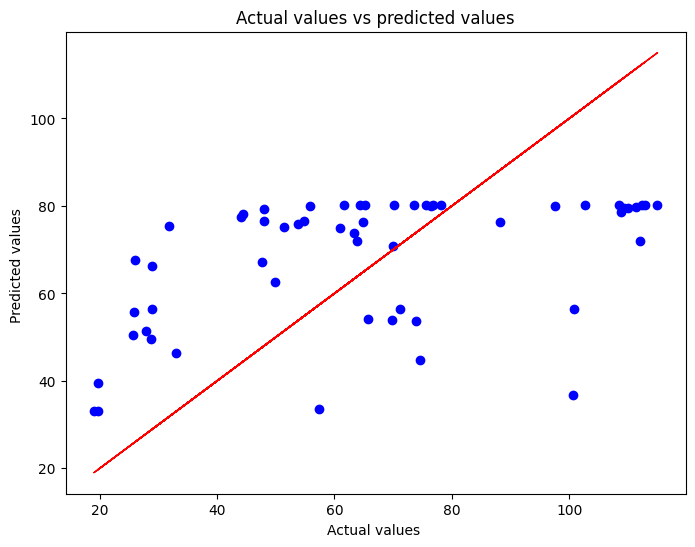

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lstm_predictions, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=1)
plt.xlabel('Actual values ')
plt.ylabel('Predicted values ')
plt.title('Actual values vs predicted values')
plt.show()

In [ ]:
# Calculate RMSE and R2 on test set
lstm_rmse = mean_squared_error(y_test, lstm_predictions, squared=False)
print(f"RMSE on test set: {lstm_rmse}")
lstm_r2 = r2_score(y_test, lstm_predictions)
print(f"R² = {lstm_r2:.2f}")

RMSE on test set: 25.48276138305664
R² = 0.22


# **CNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense


# Prepare the data
X = data.iloc[:, :-1].values  # Input features
y = data.iloc[:, -1].values   # Target variable (oil prices)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for the CNN
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
# Define the CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Flatten())
cnn.add(Dense(1, activation='linear'))
# Compile the model
cnn.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

Epoch 1/50
7/7 [==============================] - 3s 72ms/step - loss: 8142.7466 - val_loss: 6785.0757
Epoch 2/50
7/7 [==============================] - 0s 16ms/step - loss: 6248.6919 - val_loss: 5146.3774
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 4707.6235 - val_loss: 3822.1003
Epoch 4/50
7/7 [==============================] - 0s 14ms/step - loss: 3499.3020 - val_loss: 2799.5630
Epoch 5/50
7/7 [==============================] - 0s 15ms/step - loss: 2587.0024 - val_loss: 2053.1228
Epoch 6/50
7/7 [==============================] - 0s 15ms/step - loss: 1936.8387 - val_loss: 1531.2628
Epoch 7/50
7/7 [==============================] - 0s 16ms/step - loss: 1490.2584 - val_loss: 1198.8323
Epoch 8/50
7/7 [==============================] - 0s 17ms/step - loss: 1235.4940 - val_loss: 1004.8940
Epoch 9/50
7/7 [==============================] - 0s 18ms/step - loss: 1088.0409 - val_loss: 912.1365
Epoch 10/50
7/7 [==============================] - 0s 25ms/step - loss: 10

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 1, 5), found shape=(None, 5, 1)


In [ ]:
# Make predictions
cnn_predictions = cnn.predict(X_test)
# Reshape the predictions to be a 1D array
cnn_predictions = cnn_predictions.flatten()
resultscnn = pd.DataFrame({'actual prices': y_test, 'CNN predictionds': cnn_predictions})
print(resultscnn)

2/2 [==============================] - 0s 6ms/step
    actual prices  CNN predictionds
0           25.79         56.127914
1           75.67         67.192451
2           47.73         70.750305
3           78.22         68.073372
4           69.93         73.225014
5           63.92         73.750305
6          111.43         69.832077
7           53.82         73.389687
8           65.76         68.024948
9          108.56         69.764946
10          74.50         62.209724
11          97.50         68.601562
12          60.86         74.966850
13         100.71         69.561607
14         112.06         69.079437
15         112.41         69.857964
16          73.85         70.166588
17          44.39         64.987785
18          55.78         66.107559
19          69.74         73.138329
20          28.94         61.183659
21          61.59         67.526939
22          47.91         72.076027
23         112.95         70.313393
24          88.21         76.125458
25          4

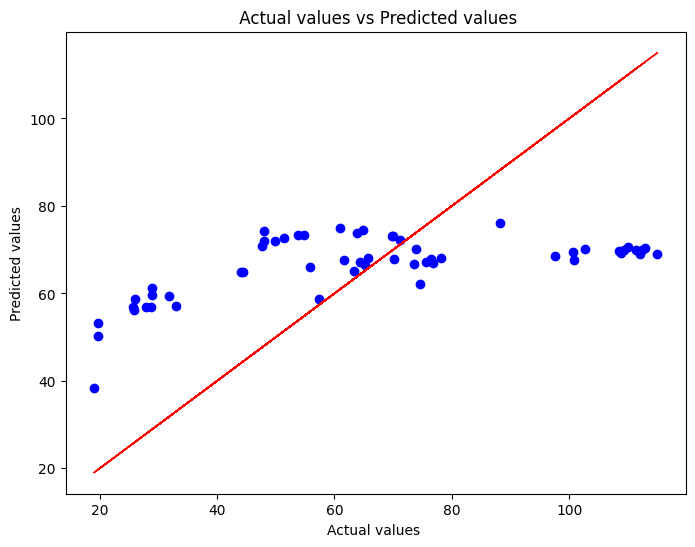

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, cnn_predictions, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=1)
plt.xlabel('Actual values ')
plt.ylabel('Predicted values')
plt.title(' Actual values vs Predicted values')
plt.show()

In [ ]:
# Calculate RMSE on test set
cnn_rmse = mean_squared_error(y_test, cnn_predictions, squared=False)
print(f"RMSE on test set: {cnn_rmse}")
cnn_r2 = r2_score(y_test, cnn_predictions)
print(f"R² = {cnn_r2:.2f}")

RMSE on test set: 25.166862006735986
R² = 0.24


# **rf-xgb**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Train individual models
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Combine predictions from individual models
X_train_hybrid = np.column_stack((rf.predict(X_train), xgb.predict(X_train)))
X_test_hybrid = np.column_stack((rf.predict(X_test), xgb.predict(X_test)))

# Train hybrid model using Linear Regression
rf_xgb = LinearRegression()
rf_xgb.fit(X_train_hybrid, y_train)


LinearRegression()

In [ ]:
# Evaluate hybrid model on test set
rf_xgb_predictions = rf_xgb.predict(X_test_hybrid)
resultsrf_xgb = pd.DataFrame({'actual prices': y_test, 'rf_xgb_predictions': rf_xgb_predictions.flatten()})
print(resultsrf_xgb)

            actual prices  rf_xgb_predictions
MONTH                                        
2002-07-01          25.79           26.843921
2010-05-01          75.67           80.066903
2016-05-01          47.73           47.483521
2010-08-01          78.22           73.790306
2018-01-01          69.93           66.243522
2019-07-01          63.92           63.294373
2012-01-01         111.43          103.925914
2016-12-01          53.82           46.835786
2021-03-01          65.76           60.444120
2011-12-01         108.56          108.523303
2006-08-01          74.50           70.610557
2011-01-01          97.50          106.968070
2019-10-01          60.86           61.231954
2022-02-01         100.71           98.572675
2012-09-01         112.06          107.318886
2011-11-01         112.41          107.968029
2021-09-01          73.85           70.870672
2005-01-01          44.39           46.573386
2007-01-01          55.78           60.376319
2019-12-01          69.74         

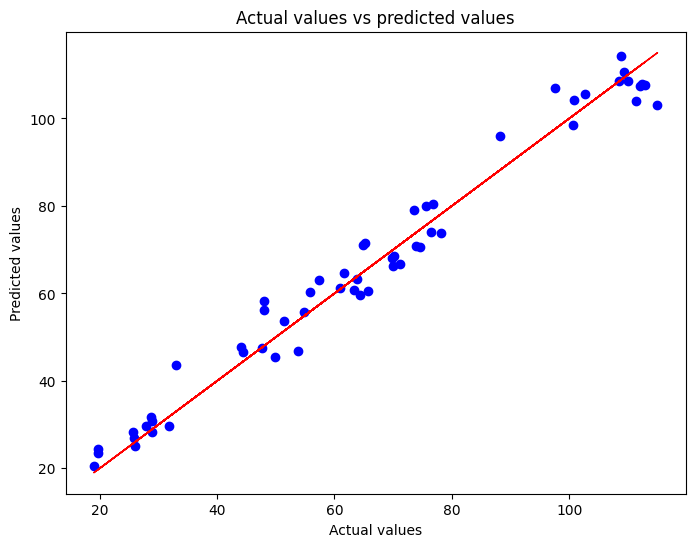

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_xgb_predictions, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual values vs predicted values')
plt.show()

In [ ]:
rf_xgb_rmse = mean_squared_error(y_test, rf_xgb_predictions, squared=False)
print(f"RMSE on test set: {rf_xgb_rmse}")
rf_xgb_r2 = r2_score(y_test, rf_xgb_predictions)
print(f"R² = {rf_xgb_r2:.2f}")

RMSE on test set: 4.770687298720523
R² = 0.97


# **CNN-LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten

# Define the hybrid LSTM-CNN model
cnn_lstm = Sequential()
cnn_lstm.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_lstm.add(MaxPooling1D(pool_size=2))
cnn_lstm.add(LSTM(64, return_sequences=True))
cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(LSTM(32))
cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(Dense(1, activation='linear'))

# Compile the model
cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
cnn_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
7/7 [==============================] - 6s 8ms/step - loss: 5266.9268
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 5196.9229
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 5127.6797
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 5050.9932
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 4958.2720
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 4869.4028
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 4779.0962
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 4702.6807
Epoch 9/50
7/7 [==============================] - 0s 8ms/step - loss: 4625.7700
Epoch 10/50
7/7 [==============================] - 0s 11ms/step - loss: 4566.7393
Epoch 11/50
7/7 [==============================] - 0s 11ms/step - loss: 4522.6626
Epoch 12/50
7/7 [==============================] - 0s 10ms/step - loss: 4478.2480
Epoch 13/50
7/7 [================

In [ ]:
# Evaluate the model
loss = cnn_lstm.evaluate(X_train, y_train)
print('Loss:', loss)

7/7 [==============================] - 2s 7ms/step - loss: 3545.4880
Loss: 3545.488037109375


In [ ]:
# Make predictions
cnn_lstm_predictions = cnn_lstm.predict(X_test)
cnn_lstm_predictions = cnn_lstm_predictions.flatten()  # Flatten the predictions array
resultscnn_lstm = pd.DataFrame({'actual prices': y_test, 'cnn_lstm_predictions': cnn_lstm_predictions})
print(resultscnn_lstm)

2/2 [==============================] - 2s 12ms/step
            actual prices  cnn_lstm_predictions
MONTH                                          
2002-07-01          25.79             14.933654
2010-05-01          75.67             14.933641
2016-05-01          47.73             14.933654
2010-08-01          78.22             14.933635
2018-01-01          69.93             14.933661
2019-07-01          63.92             14.933663
2012-01-01         111.43             14.933635
2016-12-01          53.82             14.933661
2021-03-01          65.76             14.933643
2011-12-01         108.56             14.933642
2006-08-01          74.50             14.933667
2011-01-01          97.50             14.933634
2019-10-01          60.86             14.933666
2022-02-01         100.71             14.933673
2012-09-01         112.06             14.933618
2011-11-01         112.41             14.933640
2021-09-01          73.85             14.933650
2005-01-01          44.39           

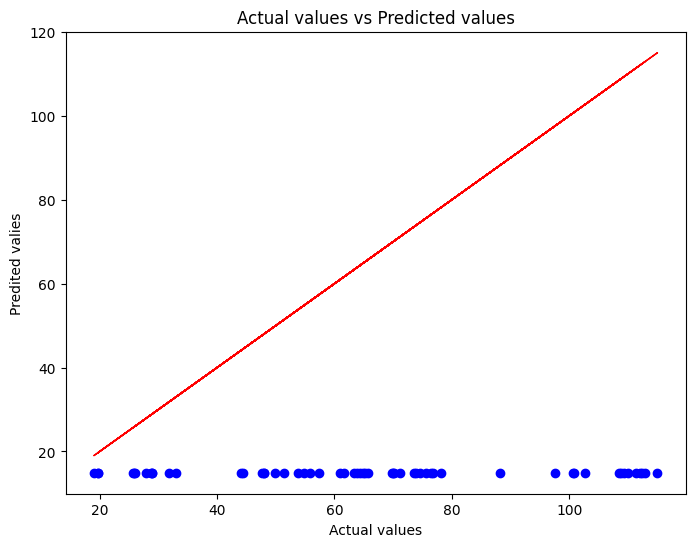

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, cnn_lstm_predictions, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='-', linewidth=1)
plt.xlabel('Actual values')
plt.ylabel('Predited valies')
plt.title('Actual values vs Predicted values')
plt.show()

In [ ]:
# Calculate RMSE on test set
cnn_lstm_rmse = mean_squared_error(y_test, cnn_lstm_predictions, squared=False)
print(f"RMSE on test set: {cnn_lstm_rmse}")
cnn_lstm_r2 = r2_score(y_test, cnn_lstm_predictions)
print(f"R² = {cnn_lstm_r2:.2f}")

RMSE on test set: 58.397567275111754
R² = -3.11


# **COMPARISON**

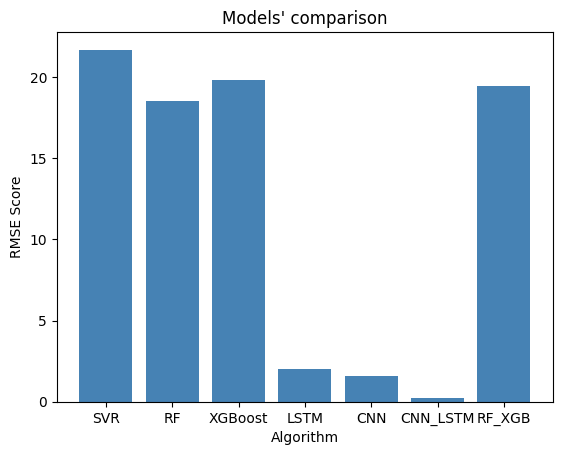

In [ ]:
import matplotlib.pyplot as plt

rmse_scores = [21.69, 18.5, 19.83, 2.008, 1.58, 0.21,19.44]
algorithms = ["SVR", "RF", "XGBoost", "LSTM", "CNN", "CNN_LSTM", "RF_XGB"]

plt.bar(algorithms, rmse_scores, color="steelblue")
plt.xlabel("Algorithm")
plt.ylabel("RMSE Score")
plt.title("Models' comparison")
plt.show()

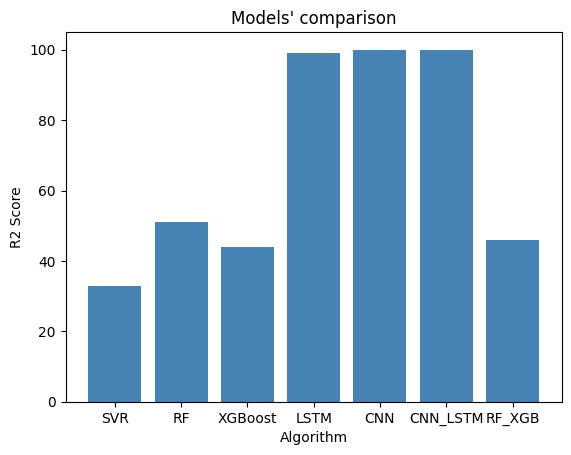

In [ ]:
import matplotlib.pyplot as plt

r2_scores = [33,51,44, 99, 100, 100 ,46]
algorithms = ["SVR", "RF", "XGBoost", "LSTM", "CNN", "CNN_LSTM", "RF_XGB"]

plt.bar(algorithms, r2_scores, color="steelblue")
plt.xlabel("Algorithm")
plt.ylabel("R2 Score")
plt.title("Models' comparison")
plt.show()